<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#PLotting 2D sigmoid

The equation ofa sigmoid function is:


**$\sigma_{w,b}(x)=\frac{1}{1+e^{-wx+ b }}$**

In [0]:
def sig_2D(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sig_2D(1,2,2)

0.9820137900379085

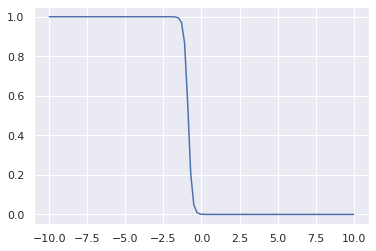

In [0]:
b=-7     #@param {type: "slider", min: -10, max: 10,step:0.5}
w=-8     #@param {type: "slider", min: -20, max: 20, step: 0.5}
X=np.linspace(-10,10,100)
Y=sig_2D(X,w,b)
plt.plot(X,Y)
plt.show()

#Plotting 3D Sigmoid

$\sigma_{W,b}(X)=\frac{1}{1+e^{-(\sum_i w_ix_i+b)}}$

In [0]:
def sig_3D(X,W,b):
  result=0
  for x,w in zip(X,W):
    result += np.sum(w*x)
  return 1/(1+(np.exp(-(result+b))))


In [0]:
X=np.array(([1,10],[2,20]))
W=np.array(([1,1],[0.1,0.1]))
b=2

In [0]:
result_f=sig_3D(X,W,b)
print(result_f)
print(np.ndim(result_f))

0.9999997495484255
0


As the result is coming as a scalar, hence the function defining procedure is wrong.

Let's correct the function again

In [0]:
def sig_3D(X,W,b):
    return 1/(1+(np.exp(-(W*X+b))))
# In this case the multiplication ill be element wise and it wwon't create any problem for multi dimensional tensor.

In [0]:
result=sig_3D(X,W,b)
print(result)
print(np.ndim(result))

[[0.95257413 0.99999386]
 [0.90024951 0.98201379]]
2


This is the correct output for the given input.

Now let's draw a surface plot for this.

In [0]:
from mpl_toolkits import mplot3d

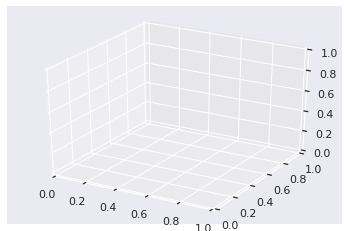

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

We need to create two vectors along the two axes and should create a meshgrid out of them

In [0]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
X_1,X_2=np.meshgrid(x1,x2)#np.meshgrid() Return coordinate matrices from coordinate vectors. So to access the first matrix we have assign X_1 and X_2.

# X_1 and X_2 both has the same elements. We can use any one of them to create the function evaluation.

In [0]:
Y=sig_3D(X_1,0.5,0)
print(Y)

[[0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 ...
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]]


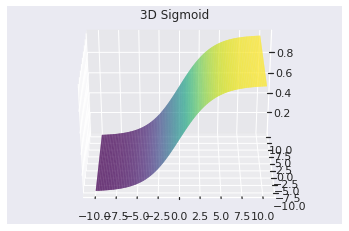

In [0]:
ax = plt.axes(projection='3d')
ax.plot_surface(X_1,X_2,Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Sigmoid')
ax.view_init(30,270)

Date: 22.11.2019

Till now we have given a 2D tensor as X and W input to the sigmoid function and calculated the output as Y and plotted a 3D surface plot for Y vs X1 and X2. But Y is computed for X1 only.

Now we will compute Y for both X1 and X2 and will have a 3D surface plot for Y vs. X1 and X2. Y need to be a 2D tensor and X1 and X2 should also be a 2D tensor each.

So today we will do the following task.

1. Define a sigmoid function from two X tensors.
2. Plot the corresponding 3D plot of the Y vs (X1 and X2)
3. PLot the Y vs (w and b)
4. plot the contour plot of Y vs (X1 and X2)


In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,1)


In [39]:
print(Y)
print(X1_g.shape)
print(type(X1_g))

[[1.67014218e-05 1.84765467e-05 2.04403384e-05 ... 2.31116029e-01
  2.49550680e-01 2.68941421e-01]
 [1.84765467e-05 2.04403384e-05 2.26128482e-05 ... 2.49550680e-01
  2.68941421e-01 2.89258118e-01]
 [2.04403384e-05 2.26128482e-05 2.50162583e-05 ... 2.68941421e-01
  2.89258118e-01 3.10457825e-01]
 ...
 [2.31116029e-01 2.49550680e-01 2.68941421e-01 ... 9.99815183e-01
  9.99832937e-01 9.99848985e-01]
 [2.49550680e-01 2.68941421e-01 2.89258118e-01 ... 9.99832937e-01
  9.99848985e-01 9.99863492e-01]
 [2.68941421e-01 2.89258118e-01 3.10457825e-01 ... 9.99848985e-01
  9.99863492e-01 9.99876605e-01]]
(100, 100)
<class 'numpy.ndarray'>


In [0]:
from mpl_toolkits import mplot3d

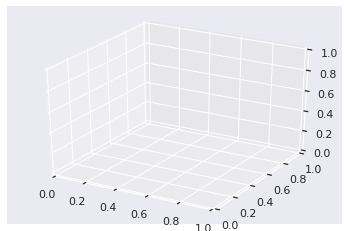

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0, 'X2')

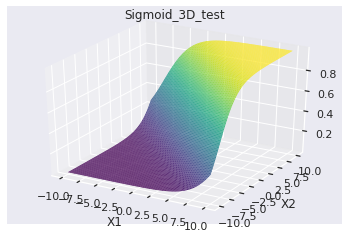

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1_g,X2_g,Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Sigmoid_3D_test')
plt.xlabel('X1')
plt.ylabel('X2')
# plt.zlabel('Y')
#ax.view_init(30,270)